# Visualiza teste classif

Rodado pelo 015

In [99]:
##### Computação cietífica
import numpy as np
##### Manipulação e análise
import pandas as pd
##### Análise exploratória visual
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
i=pd.read_csv('~/comex/data/imp5.csv')[['ANO','MES','NCM','KG','grupo_mes']]

In [150]:
# Artimanha para fornecer uma unica linha de informação onde nao existe ocorrência, gerando problema no gráfico
i=pd.concat([i,pd.DataFrame({'ANO':[2020],'MES':[3],'NCM':['31055900-1'],'KG':[0],'grupo_mes':[1]})])

In [151]:
i['oc']=0
i.loc[i.KG>0,'oc']=1
i

,ANO,MES,NCM,KG,grupo_mes,oc
0,1997,2,31022100-0,17054076.0,3,1
1,1997,3,31022100-0,6004584.0,1,1
2,1997,3,31022100-0,17054076.0,2,1
3,1997,4,31022100-0,11049492.0,1,1
4,1997,5,31022100-0,4202529.0,1,1
...,...,...,...,...,...,...
1375,2023,10,31042090-1,37437366.0,1,1
1376,2023,10,31054000-1,14695000.0,1,1
1377,2023,10,31055900-1,9516500.0,1,1
1378,2023,10,31059090-0,1416000.0,1,1


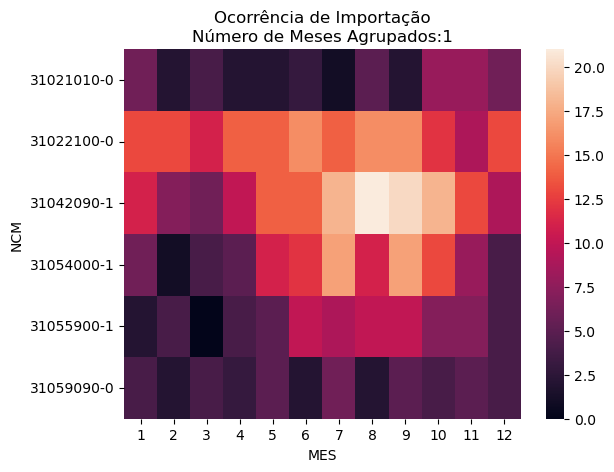

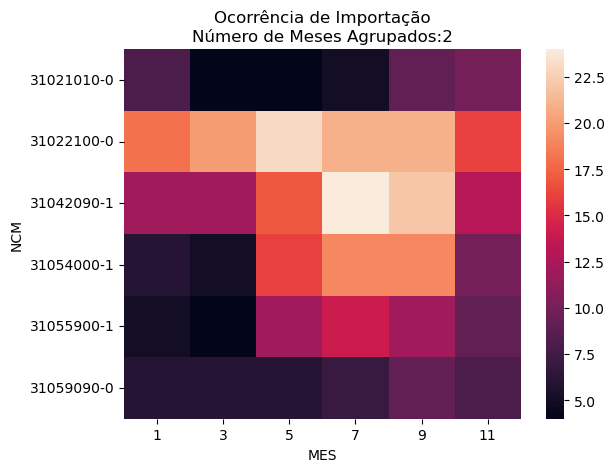

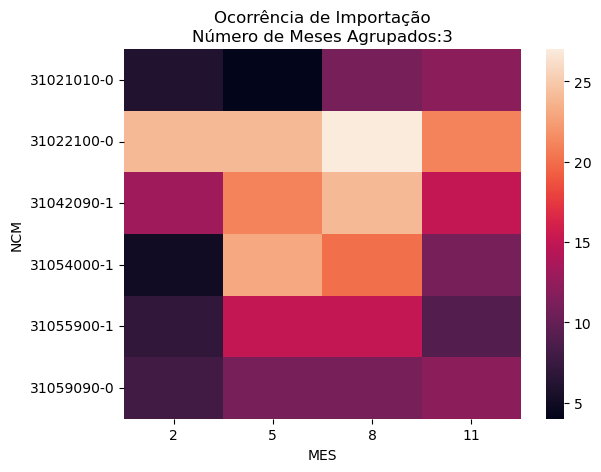

In [152]:
for gm in sorted(i.grupo_mes.unique()):
    it=i[i.grupo_mes==gm]
    it=it.groupby(by=['NCM','MES']).oc.sum().reset_index()
    it=it.pivot(index='NCM',columns='MES',values='oc')
    sns.heatmap(it).set_title(f"Ocorrência de Importação\nNúmero de Meses Agrupados:{gm}")
    plt.show()